In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 神经元函数及优化方法

## 激活函数

    tf.nn.relu()
    tf.nn.sigmoid()
    tf.nn.tanh()
    tf.nn.elu()
    tf.nn.bias_add()
    tf.nn.crelu()
    tf.nn.relu6()
    tf.nn.softsign()
    tf.nn.softplus()
    tf.nn.dropout() # 防止过拟合，用来舍弃某些神经元

In [2]:
x = np.linspace(-10,10,1000)

In [3]:
# sigmoid函数
a = tf.constant([[1.0,2.0],[1.0,2.0]])
with tf.Session() as sess:
    with tf.device("/gpu:0"):
        print(sess.run(tf.nn.sigmoid(a)))

[[0.7310586 0.880797 ]
 [0.7310586 0.880797 ]]


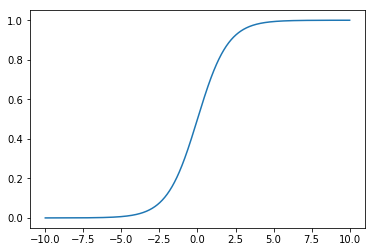

In [4]:
# sigmoid函数图像如下
y = tf.nn.sigmoid(x)
with tf.Session() as sess:
    y = sess.run(y)
plt.plot(x,y)

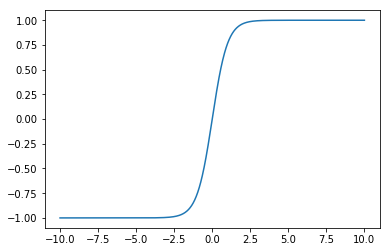

In [5]:
# tanh函数图像如下
y = tf.nn.tanh(x)
with tf.Session() as sess:
    y = sess.run(y)
plt.plot(x,y)

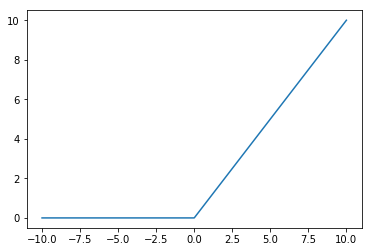

In [6]:
# relu函数图像如下
y = tf.nn.relu(x)
with tf.Session() as sess:
    y = sess.run(y)
plt.plot(x,y)

In [16]:
# drop函数
a = tf.constant([[-1.0,2.0,3.0,4.0]])
with tf.Session() as sess:
    print(sess.run(tf.nn.dropout(a,0.5,noise_shape=[1,4]))) # 每个元素是否被抑制是相互独立的,相当于默认的None
    print(sess.run(tf.nn.dropout(a,0.5,noise_shape=[1,1]))) # 元素是否被抑制是相关联的，同时被抑制或不抑制

[[-0.  4.  6.  0.]]
[[-0.  0.  0.  0.]]


## 卷积函数

    tf.nn.convolution(input, filter, padding, strides=None, dilation_rate=None, name=None, data_format=None)
    tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=True, data_format='NHWC', dilations=[1, 1, 1, 1], name=None)
    tf.nn.depthwise_conv2d(input, filter, strides, padding, rate=None, name=None, data_format=None)
    tf.nn.conv2d_transpose(value, filter, output_shape, strides, padding='SAME', data_format='NHWC', name=None)# 反卷积

In [19]:
# 卷积
input_data = tf.Variable(np.random.rand(10,9,9,3),dtype=np.float32)
filter_data = tf.Variable(np.random.rand(2,2,3,2),dtype=np.float32)
y = tf.nn.conv2d(input=input_data, filter=filter_data, strides=[1,1,1,1], padding='SAME')
print(y.shape)

(10, 9, 9, 2)


In [23]:
# 反卷积
x = tf.random_normal(shape=[1,3,3,1])
kernel = tf.random_normal(shape=[2,2,3,1])
y = tf.nn.conv2d_transpose(x,kernel,output_shape=[1,5,5,3],strides=[1,2,2,1],padding='SAME')
print(y.shape)

(1, 5, 5, 3)


## 池化函数

    tf.nn.avg_pool(value, ksize, strides, padding, data_format='NHWC', name=None)
    tf.nn.max_pool(value, ksize, strides, padding, data_format='NHWC', name=None)

## 分类函数

    tf.nn.sigmoid_cross_entropy_with_logits()
    tf.nn.softmax(logits, axis=None, name=None, dim=None)
    tf.nn.log_softmax()
    tf.nn.softmax_cross_entropy_with_logits()
    tf.nn.sparse_softmax_cross_entropy_with_logits()

## 优化方法

    tf.train.GradientDescentOptimizer()
    tf.train.AdadeltaOptimizer()
    tf.train.AdagradDAOptimizer()
    tf.train.MomentumOptimizer()
    tf.train.FtrlOptimizer()
    tf.train.RMSPropOptimizer()
    8个优化器对应8种优化方法，分别是梯度下降法（BGD,SDG）、Adadelta法、Adagrad法（Adagrad，AdagradDAO）、Momentum法（Momentum、Nesterov Momentum）、Adam、Ftrl和RMSProp法
    其中，BGD、SGD、Momentum和Nesterov Momentum是手动指定学习率的，其余算法能够自动调节学习率